# **1. Perkenalan Dataset**


**# Analisis Dataset Kejahatan terhadap Perempuan di India
Evaluasi Terhadap Kriteria Dataset
Dataset: Kejahatan terhadap perempuan di India (2001-2021)**

**Kelebihan Dataset:**

**Ukuran**: Dengan 2500 baris, dataset cukup besar untuk analisis clustering.
Variasi: Dataset mencakup berbagai jenis kejahatan, tahun, dan negara bagian, memberikan keragaman yang baik untuk analisis.

**Ketersediaan**: Dataset berasal dari sumber pemerintah yang terpercaya, sehingga kualitas datanya dapat diandalkan.

**Relevansi**: Topik kejahatan terhadap perempuan adalah isu sosial yang penting, sehingga analisis terhadap dataset ini dapat memberikan wawasan yang berharga.

**Kekurangan Potensial:**

**Definisi Kejahatan**: Perlu dijelaskan secara detail bagaimana setiap jenis kejahatan didefinisikan dalam dataset. Definisi yang berbeda dapat mempengaruhi hasil analisis.

**Data Hilang**: Adanya data yang hilang (missing values) dapat mempengaruhi analisis. Perlu dilakukan penanganan data yang hilang, seperti penghapusan baris atau imputasi.

**Bias**: Kemungkinan adanya bias dalam pengumpulan data, seperti underreporting atau perbedaan dalam metode pelaporan antar negara bagian.


**Kesimpulan**
Dataset ini secara umum memenuhi kriteria yang telah ditentukan. Dataset memiliki ukuran yang cukup, variasi data yang baik, dan relevansi dengan topik yang menarik. Namun, perlu dilakukan pemeriksaan lebih lanjut terhadap definisi kejahatan, data hilang, dan kemungkinan bias untuk memastikan kualitas data sebelum melakukan analisis clustering.

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santanamwishal","key":"0f1b95c5d175d3a123ceca7ce4b765cd"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download 'balajivaraprasad/crimes-against-women-in-india-2001-2021'

Dataset URL: https://www.kaggle.com/datasets/balajivaraprasad/crimes-against-women-in-india-2001-2021
License(s): apache-2.0
  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 28.3MB/s]


In [7]:
!unzip crimes-against-women-in-india-2001-2021.zip

Archive:  crimes-against-women-in-india-2001-2021.zip
  inflating: CrimesOnWomenData.csv   
  inflating: description.csv         


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [8]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [9]:
# Membaca dataset kualitas wine dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('CrimesOnWomenData.csv')
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
# 1. Memahami Struktur Data
# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [11]:
# Menampilkan informasi dataset: jumlah baris, kolom, dan tipe data
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2944 non-null   int64 
 1   State       2944 non-null   object
 2   Year        2944 non-null   int64 
 3   Rape        2944 non-null   int64 
 4   K&A         2944 non-null   int64 
 5   DD          2944 non-null   int64 
 6   AoW         2944 non-null   int64 
 7   AoM         2944 non-null   int64 
 8   DV          2944 non-null   int64 
 9   WT          2944 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 230.1+ KB
None


In [ ]:
# Mengecek statistik deskriptif untuk memahami distribusi data numerikal
print("\nStatistik Deskriptif Data Numerikal:")
print(df.describe())


Statistik Deskriptif Data Numerikal:
       Unnamed: 0         Year         Rape           K&A           DD  \
count  736.000000   736.000000   736.000000    736.000000   736.000000   
mean   367.500000  2011.149457   727.855978   1134.542120   215.692935   
std    212.609188     6.053453   977.024945   1993.536828   424.927334   
min      0.000000  2001.000000     0.000000      0.000000     0.000000   
25%    183.750000  2006.000000    35.000000     24.750000     1.000000   
50%    367.500000  2011.000000   348.500000    290.000000    29.000000   
75%    551.250000  2016.000000  1069.000000   1216.000000   259.000000   
max    735.000000  2021.000000  6337.000000  15381.000000  2524.000000   

                AoW          AoM            DV          WT  
count    736.000000   736.000000    736.000000  736.000000  
mean    1579.115489   332.722826   2595.078804   28.744565  
std     2463.962518   806.024551   4042.004953   79.999660  
min        0.000000     0.000000      0.000000    0

In [ ]:
# 2. Menangani Data yang Hilang
# Mengecek data yang hilang
print("\nCek Data yang Hilang:")
print(df.isnull().sum())


Cek Data yang Hilang:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [ ]:
# 3. Analisis Distribusi dan Korelasi
# Visualisasi distribusi variabel numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns

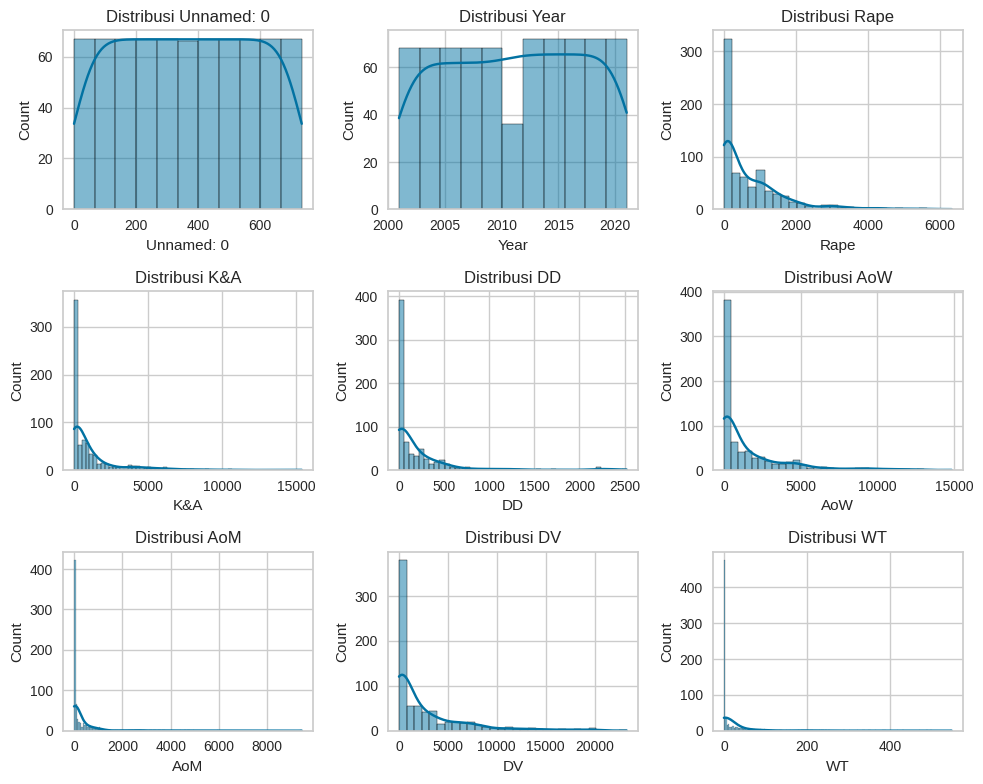

In [ ]:
# Histogram untuk variabel numerik
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

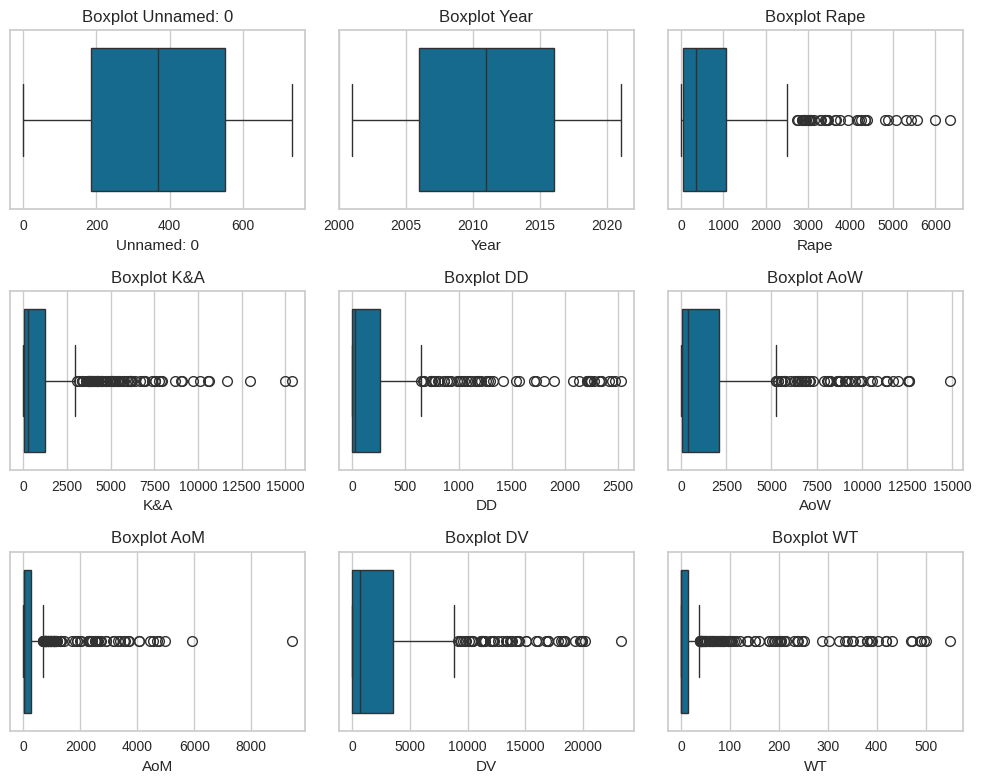

In [ ]:
# Boxplot untuk variabel numerik
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

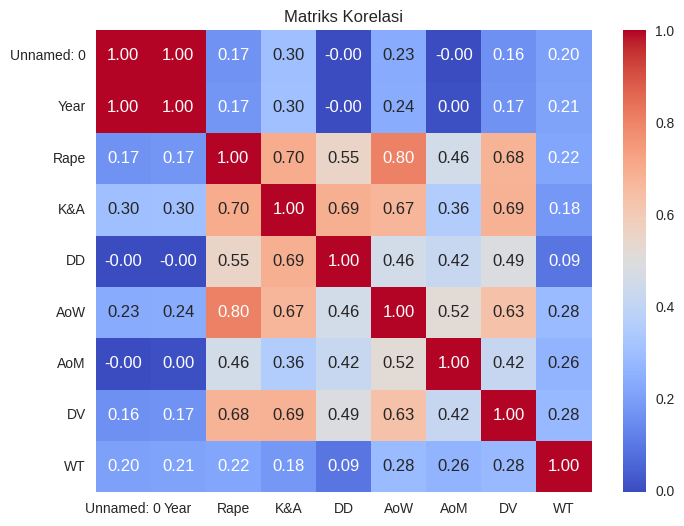

In [ ]:
# Matriks korelasi
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

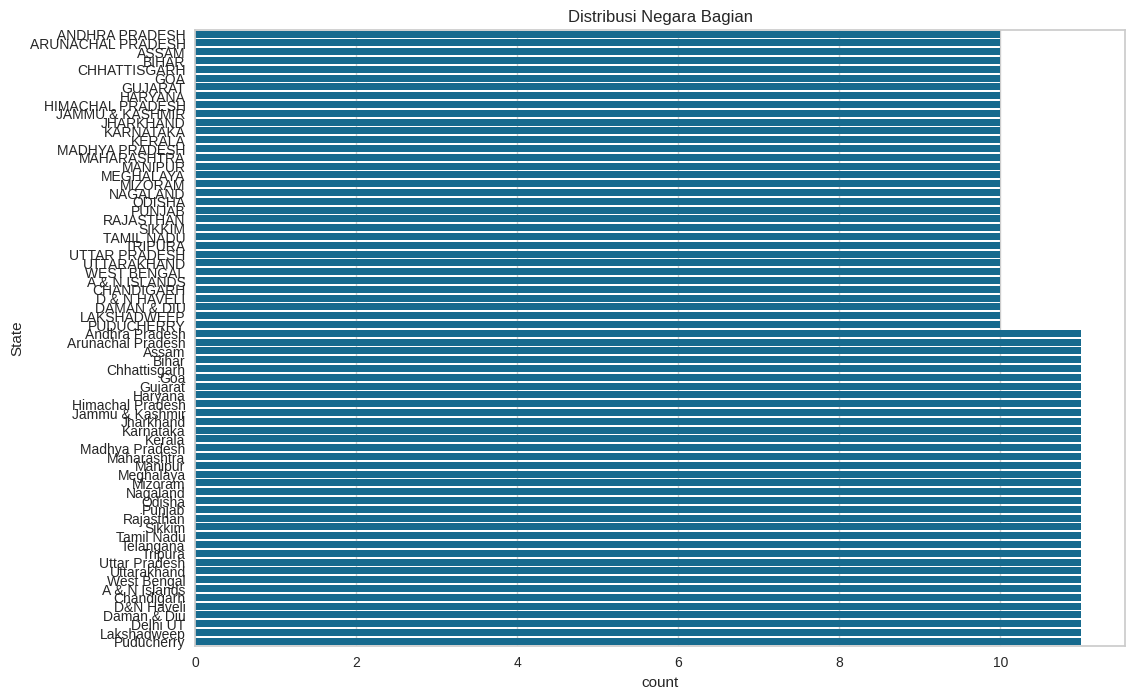

In [ ]:
# 4. Visualisasi Data
# Distribusi variabel kategorikal
plt.figure(figsize=(12, 8))
sns.countplot(y='State', data=df)
plt.title('Distribusi Negara Bagian')
plt.show()

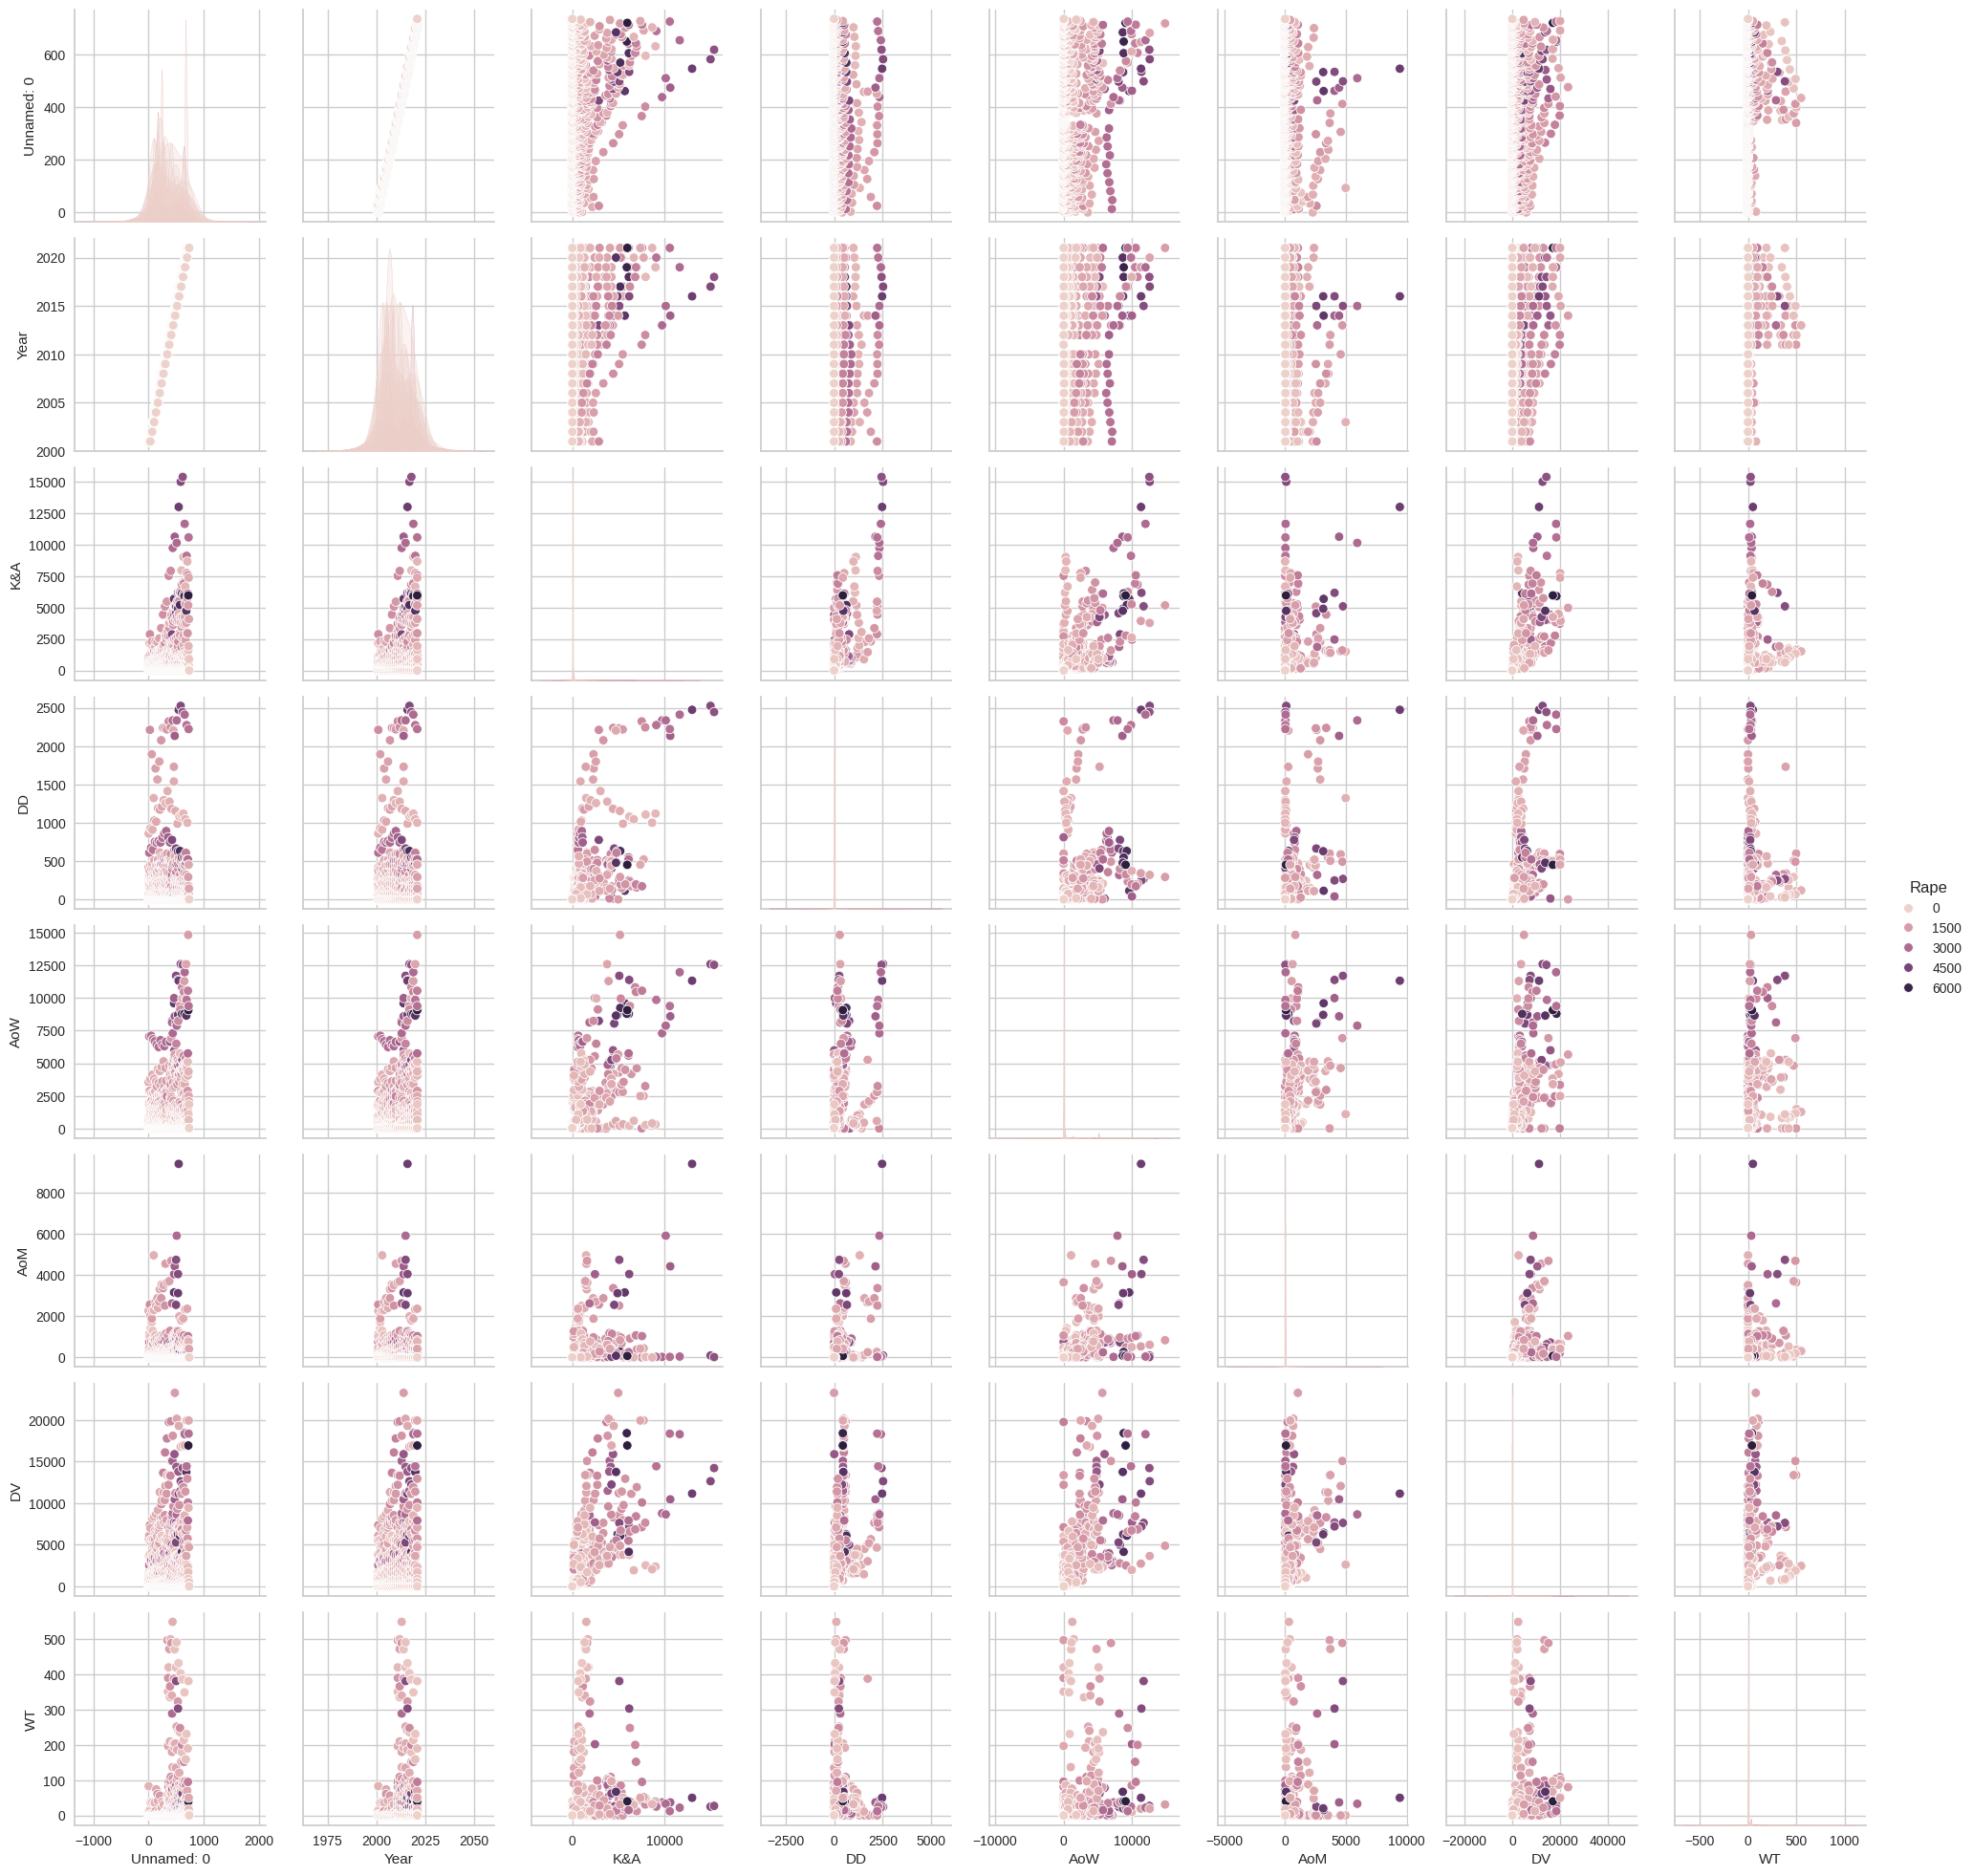

In [ ]:
# Pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(df, hue='Rape')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Mengecek jumlah data kosong di setiap kolom
print("Jumlah Missing Values:")
print(df.isnull().sum())

# Menghapus baris yang memiliki data kosong
df = df.dropna()

# Atau, mengisi nilai kosong (misalnya, dengan mean untuk kolom numerik)
# df.fillna(df.mean(), inplace=True)

Jumlah Missing Values:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [ ]:
# Mengecek dan menghapus data duplikat
print(f"Jumlah Data Duplikat: {df.duplicated().sum()}")
df = df.drop_duplicates()

Jumlah Data Duplikat: 0


In [ ]:
# Standarisasi data numerik
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalisasi
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Menggunakan metode IQR untuk mendeteksi outlier
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Label encoding untuk kolom State
df['State'] = LabelEncoder().fit_transform(df['State'])

In [ ]:
# Binning pada kolom Dowry Deaths (DD)
df['DD_Bin'] = pd.cut(df['DD'], bins=[0, 10, 50, 100, 1000, 10000], labels=['Zero', 'Very Low', 'Low', 'High', 'Very High'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Menentukan jumlah klaster optimal menggunakan Metode Elbow
inertia = []
range_n_clusters = range(1, 11)
# Menyimpan hanya kolom numerik
df = df.select_dtypes(include=[np.number])

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

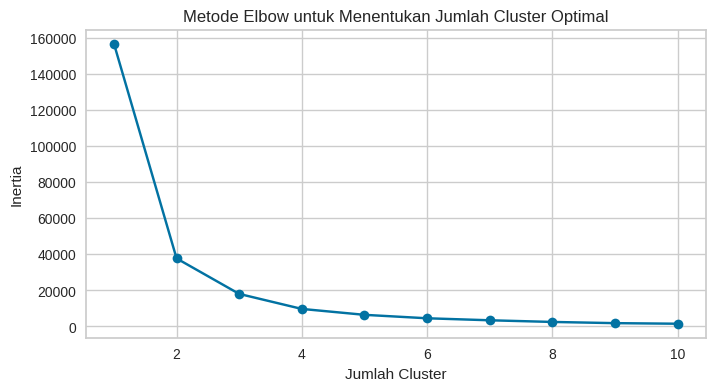

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

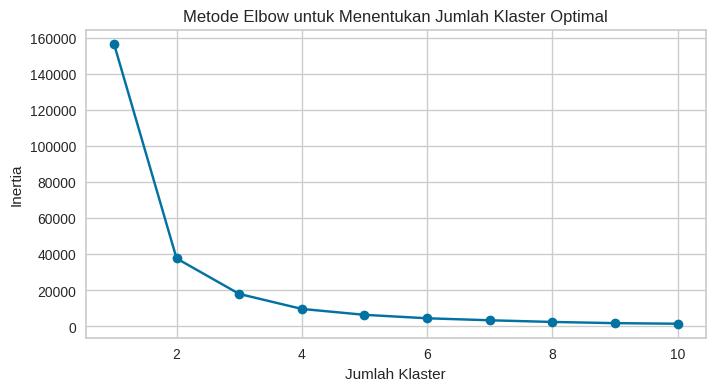

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

In [ ]:
# Menghitung Silhouette Score untuk setiap jumlah klaster
silhouette_scores = []
for k in range(2, 11):  # Mulai dari 2 karena Silhouette Score tidak didefinisikan untuk 1 klaster
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

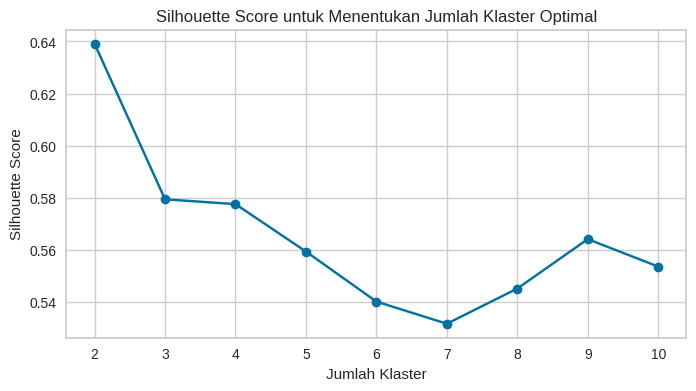

In [ ]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.show()

In [ ]:
# Pilih jumlah klaster yang sesuai berdasarkan plot
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(df)

In [ ]:
# Menambahkan label klaster ke dalam dataset
df['Cluster'] = cluster_labels

In [ ]:
# Menghitung Silhouette Score untuk menilai kualitas klaster
silhouette_avg = silhouette_score(df, cluster_labels)
print(f'Silhouette Score untuk {n_clusters} klaster: {silhouette_avg}')

Silhouette Score untuk 2 klaster: 0.6395613717571694


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

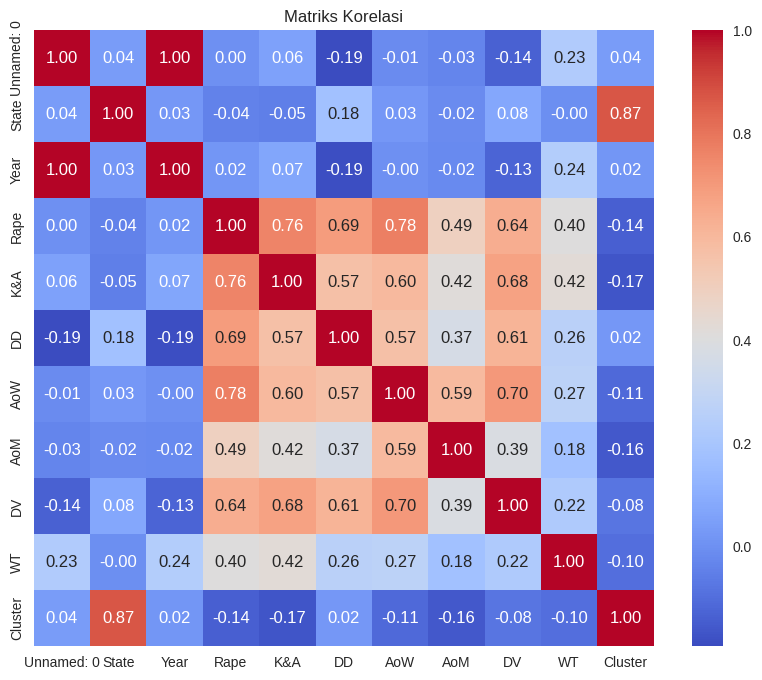

In [ ]:
# Tahap 1: Analisis Korelasi dan Pemilihan Fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
# Menghapus fitur yang memiliki korelasi tinggi, misalnya jika korelasi > 0.0
# (Pastikan menyesuaikan fitur sesuai dengan analisis korelasi di atas)
df_reduced = df.drop(columns=['Unnamed: 0', 'Year', 'Rape', 'State'])

In [ ]:
# Alternatif: Menggunakan PCA untuk mengurangi dimensi
pca = PCA(n_components=2)  # Mengambil 4 komponen utama
df_pca = pca.fit_transform(df)

In [ ]:
# Tahap 2: Melatih Model dengan Fitur Terpilih
# Mencari jumlah klaster optimal dengan Metode Elbow untuk data hasil feature selection
inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

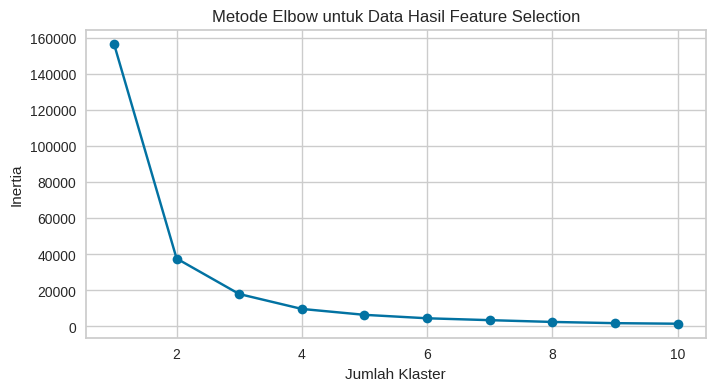

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Data Hasil Feature Selection')
plt.show()

In [ ]:
# Pilih jumlah klaster optimal
optimal_clusters = 2
kmeans_optimized = KMeans(n_clusters=optimal_clusters, random_state=0)
df_reduced['Cluster'] = kmeans_optimized.fit_predict(df_pca)

In [ ]:
# Tahap 3: Evaluasi dan Perbandingan Performa
silhouette_original = silhouette_score(df, KMeans(n_clusters=optimal_clusters, random_state=0).fit_predict(df))
silhouette_reduced = silhouette_score(df_reduced, df_reduced['Cluster'])

In [ ]:
print(f'Silhouette Score sebelum feature selection: {silhouette_original}')
print(f'Silhouette Score sesudah feature selection: {silhouette_reduced}')

Silhouette Score sebelum feature selection: 0.6395613717571694
Silhouette Score sesudah feature selection: 0.898918894338701


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
centroids = kmeans.cluster_centers_

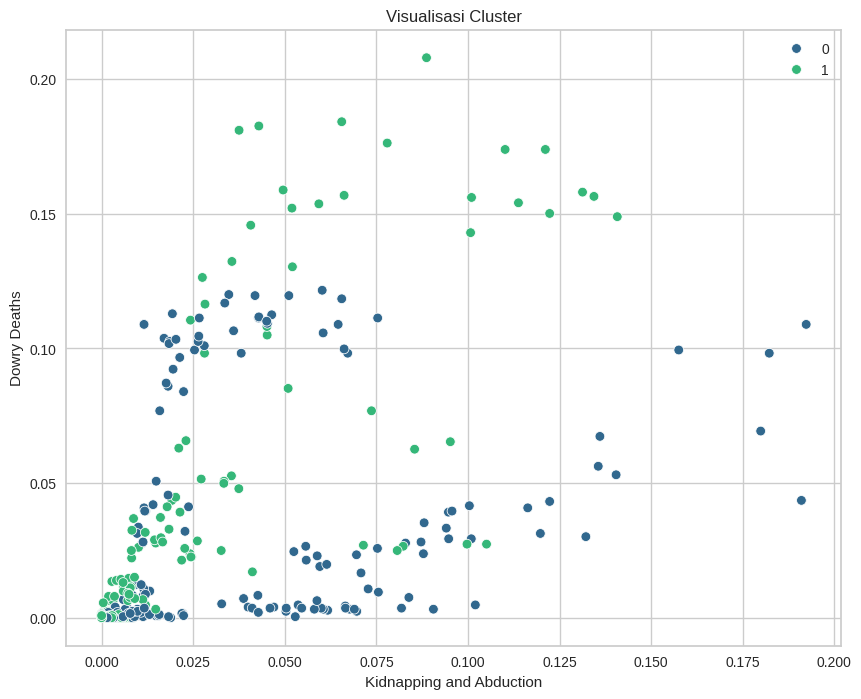

In [ ]:
x_column = 'K&A'
y_column = 'DD'

# Buat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_reduced, x=x_column, y=y_column, hue='Cluster', palette='viridis')
plt.title('Visualisasi Cluster')
plt.xlabel('Kidnapping and Abduction')
plt.ylabel('Dowry Deaths')
plt.legend()


plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}:  Kidnapping and Abduction = {centroid[0]:.2f}, Dowry Deaths = {centroid[1]:.2f}")

Nilai Centroids:
Centroid 1:  Kidnapping and Abduction = -2.00, Dowry Deaths = 0.06
Centroid 2:  Kidnapping and Abduction = 16.50, Dowry Deaths = -0.06
Centroid 3:  Kidnapping and Abduction = -18.84, Dowry Deaths = 0.10
Centroid 4:  Kidnapping and Abduction = 29.74, Dowry Deaths = 0.09
Centroid 5:  Kidnapping and Abduction = 4.73, Dowry Deaths = -0.19
Centroid 6:  Kidnapping and Abduction = -12.38, Dowry Deaths = -0.02
Centroid 7:  Kidnapping and Abduction = -25.34, Dowry Deaths = -0.06
Centroid 8:  Kidnapping and Abduction = 22.89, Dowry Deaths = -0.14
Centroid 9:  Kidnapping and Abduction = 10.97, Dowry Deaths = 0.24
Centroid 10:  Kidnapping and Abduction = -6.73, Dowry Deaths = -0.09


Visualisasi klasterisasi pada gambar tersebut menunjukkan dua klaster yang diberi warna biru (klaster 0) dan hijau (klaster 1). Berikut adalah analisis dan interpretasi dari visualisasi ini berdasarkan dua fitur yang ditampilkan, yaitu **Kidnapping and Abduction** pada sumbu-x dan **Dowry Deaths** pada sumbu-y:

1. **Distribusi Klaster**:
   - Klaster biru (klaster 0) dan hijau (klaster 1) tampak saling tumpang tindih pada nilai rendah untuk fitur **Kidnapping and Abduction** dan **Dowry Deaths** (di area kiri bawah grafik).
   - Klaster biru menyebar ke bagian kanan grafik, menunjukkan bahwa nilai yang lebih tinggi untuk **Kidnapping and Abduction** cenderung berada di klaster ini.
   - Klaster hijau lebih terpusat di tengah grafik, dengan konsentrasi yang tinggi di sekitar rentang nilai rendah hingga sedang untuk kedua fitur.

2. **Pemisahan Antar Klaster**:
   - Pemisahan klaster terlihat tidak terlalu jelas karena terdapat tumpang tindih yang cukup signifikan pada nilai rendah untuk kedua fitur tersebut.
   - Hal ini menunjukkan bahwa model klasterisasi mungkin mengalami kesulitan dalam membedakan dua kelompok ini secara jelas, khususnya pada data dengan nilai rendah untuk **Kidnapping and Abduction** dan **Dowry Deaths**.
   - Namun, pada nilai yang lebih tinggi untuk **Kidnapping and Abduction** (di atas 0.1), klaster biru tampak mendominasi, yang menunjukkan bahwa model lebih mungkin mengelompokkan data tersebut ke dalam klaster 0.

3. **Interpretasi Klaster Berdasarkan Fitur**:
   - **Klaster 0 (Biru)**: Dapat diasumsikan bahwa klaster ini mencakup data dengan variasi nilai yang lebih besar untuk **Kidnapping and Abduction** dan beragam nilai untuk **Dowry Deaths**.
   - **Klaster 1 (Hijau)**: Klaster ini tampaknya terdiri dari data yang memiliki nilai **Kidnapping and Abduction** dan **Dowry Deaths** yang lebih rendah hingga sedang. Hal ini mungkin menunjukkan bahwa klaster ini lebih terkait dengan daerah atau populasi yang memiliki insiden rendah untuk kedua kejahatan tersebut.

4. **Outlier**:
   - Terdapat beberapa titik biru (klaster 0) di bagian kanan atas grafik yang tampak jauh dari sebagian besar data. Titik-titik ini mungkin mewakili outlier, yaitu daerah atau kondisi di mana insiden **Kidnapping and Abduction** dan **Dowry Deaths** terjadi dalam frekuensi yang sangat tinggi.
   - Outlier ini perlu dievaluasi lebih lanjut untuk memahami penyebab tingginya kedua fitur tersebut pada titik-titik ini.

5. **Evaluasi Kualitas Klasterisasi**:
   - Secara keseluruhan, klasterisasi ini berhasil mengelompokkan data ke dalam dua kelompok utama, tetapi masih terdapat tumpang tindih yang cukup signifikan di bagian bawah grafik.
   - Untuk meningkatkan pemisahan klaster, mungkin diperlukan fitur tambahan atau penggunaan algoritme klasterisasi yang berbeda, seperti metode hierarchical clustering atau DBSCAN jika data memiliki kepadatan yang bervariasi.

Secara umum, visualisasi ini memberikan gambaran dasar tentang struktur data berdasarkan fitur **Kidnapping and Abduction** dan **Dowry Deaths**, tetapi analisis lebih lanjut diperlukan untuk memahami konteks yang lebih dalam mengenai faktor-faktor lain yang mungkin memengaruhi pemisahan klaster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_reduced.to_csv('data_clustering.csv', index=False)